# Credit Risk Classifier

Banks play a crucial role in market economies. They decide who can get finance and on what terms they can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. Nowadays there are many risks related to lending loans, especially for the banks so as to reduce their capital loss. The analysis of risks and assessment of default becomes crucial thereafter. Banks hold huge volumes of customer behavior related data from which they are unable to arrive at a judgment if an applicant can be defaulter or not. Credit Risk assessment is a crucial issue faced by Banks nowadays which helps them to evaluate if a loan applicant can be a defaulter at a later stage so that they can go ahead and grant the loan or not. This helps the banks to minimize the possible losses and can increase the volume of credits. This is basically a classification problem.

#### Table of Contents:
Description

Credit Risk Classifier

Import Libraries

Getting the Data

Data Exploration/Analysis
    
        Feature Information
        
        Feature Description
       
        Feature Importance
        
        Analyzed Missing values

Data Visualization

    Tabular View

    Histogram
    
    Scatterplot
    
    Area plot

Feature Engineering

    Analyzed Categorical Values
    
    Analyzed Combining related features

Data Preprocessing

    Missing Data Manipulation

    Analyzing Categories
    
    Combining related features
    
Normal Cross Validation

    Split data to train and test sets
    
Building Machine Learning Models

    Training different learning models
    
    Calculating Accuracy
    
Which is the best model ?

    Decision Tree
        OR
    Random Forest
    
Evaluation
     
    F1 score
    
    Confusion Matrix
    
    Precision and Recall
    
Further Evaluation

    K-Fold Cross Validation
    
    ROC-AUC Score

Ensemble Method

    ADA Boost Classifier
    
    Gradient Boosting Classifier
    
Retrieve classified Values

    Append a column to the existing dataframe
    
    Save to csv or pdf
    
Summary

#### Description
--------------------------------------------------------------------------------------------------------------------------
For new loan applications, a financial institution wants to estimate the risk of customers defaulting on a loan and/or being 
significantly past due on a loan payment in the next two years.

#### Why we need a pre qualification check in loan lending process?

Pre-qualification is more like an educated guess on the part of the bank or lending institution about whether a loan is qualify for a customer. This estimate or loan eligibility is based on customers current earning power, credit score, financial history, etc.

In [355]:
# Import necessary libraries
# For Data Manipulation
import numpy as np 
import pandas as pd 

# For plotting
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# For scientific calculations
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [356]:
# Read data from given trainig csv file by removing the first unnamed index
train_df = pd.read_csv('cs-training.csv', index_col=0)
train_df.shape

(150000, 11)

In [357]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Feature Analysis

In [358]:
# Check the detailed column of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [359]:
# Describe the dataset with mean, std, min etc.
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Analysing the missing value details in the dataset in a table by percenage

In [360]:
# Get complete detail percentage and total of how many null values are there in each feature
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(11)

,Total,%
MonthlyIncome,29731,19.8
NumberOfDependents,3924,2.6
NumberOfTime60-89DaysPastDueNotWorse,0,0.0
NumberRealEstateLoansOrLines,0,0.0
NumberOfTimes90DaysLate,0,0.0
NumberOfOpenCreditLinesAndLoans,0,0.0
DebtRatio,0,0.0
NumberOfTime30-59DaysPastDueNotWorse,0,0.0
age,0,0.0
RevolvingUtilizationOfUnsecuredLines,0,0.0


#### Creating scatter plots with DataFrame.plot by passing kind='scatter'. Scatter plot requires numeric columns for x and y axis. These can be specified by x and y keywords each

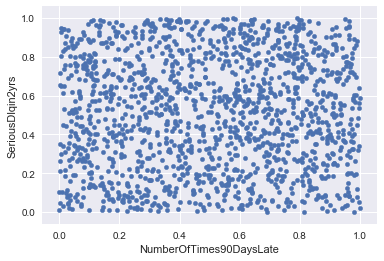

In [361]:
train_df_plt = pd.DataFrame(np.random.rand(1500, 4), columns=['SeriousDlqin2yrs','age', 'NumberOfTimes90DaysLate',
                                                          'NumberOfTime30-59DaysPastDueNotWorse'])
train_df_plt.plot(kind='scatter', x='NumberOfTimes90DaysLate', y='SeriousDlqin2yrs');

#### To plot multiple column groups in a single axes, repeat plot method specifying target ax. It is recommended to specify color and label keywords to distinguish each groups

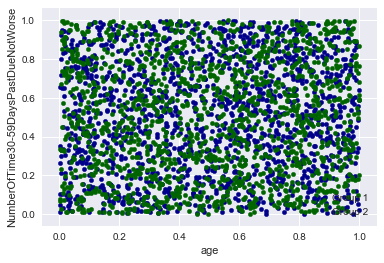

In [362]:
ax = train_df_plt.plot(kind='scatter', x='NumberOfTimes90DaysLate', y='SeriousDlqin2yrs',
                color='DarkBlue', label='Group 1');
   
train_df_plt.plot(kind='scatter', x='age', y='NumberOfTime30-59DaysPastDueNotWorse',
        color='DarkGreen', label='Group 2', ax=ax);

The above Scatter plots do not show any correlation or greater dependency of one variable to another to make any inference.

#### Updating the missing values by imputing those values to its mean as we could not remove those values because of data limitation. Plot the importance of each feature in tabular view

In [363]:
train_df = train_df.fillna(train_df.mean())
Z_train = train_df.drop("SeriousDlqin2yrs", axis=1)
W_train = train_df["SeriousDlqin2yrs"]
d1tree= DecisionTreeClassifier()
d1tree.fit(Z_train, W_train)
importances = pd.DataFrame({'feature':Z_train.columns,'importance':np.round(d1tree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
DebtRatio,0.197
RevolvingUtilizationOfUnsecuredLines,0.193
MonthlyIncome,0.150
NumberOfTimes90DaysLate,0.128
age,0.121
NumberOfOpenCreditLinesAndLoans,0.085
NumberOfDependents,0.040
NumberOfTime30-59DaysPastDueNotWorse,0.037
NumberRealEstateLoansOrLines,0.028


#### Plotting the importance in histogram

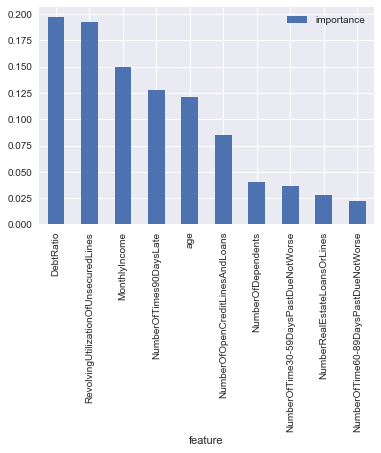

In [364]:
importances.plot.bar()

Importance of individual features are computed with the help of the tree based approach and they are listed in a decreasing order. Even though some features are less important than othes, they are not removed considering the volume of the data set while ensuring the influence of every feature on making decisions.

#### Data visualization - Represent graphically the current data and we can see 6.6% are geniune customers who are eligible to lend the loan, Others didn't  clear the approval criteria. So this shows the serious threat of blindly lending loans with out classifying the customers.

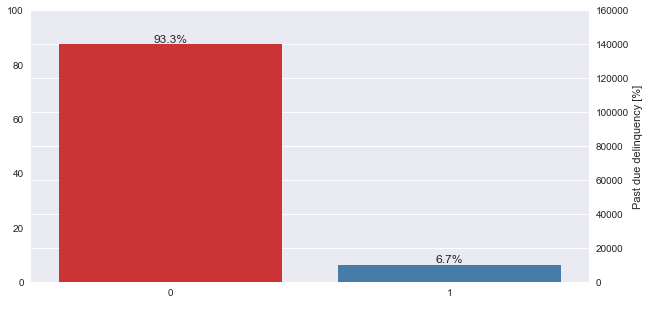

In [365]:
def add_freq():
    ncount = len(train_df)
    ax2=ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom')
    ax2.set_ylim(0,100)
    ax2.grid(None)


ax = sns.countplot(x = train_df.SeriousDlqin2yrs ,palette="Set1")
sns.set(font_scale=1.5)
sns.set(style="darkgrid")
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel('Past due delinquency [%]')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)
add_freq()
plt.show()

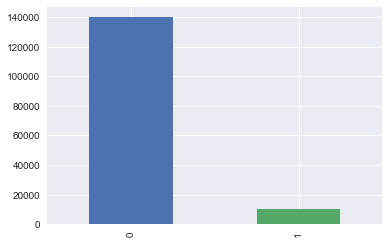

In [366]:
train_df['SeriousDlqin2yrs'].value_counts().plot(kind='bar')

#### Viewing first 15 customers data

In [367]:
train_df.head(15)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
2,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
3,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
4,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
5,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
6,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.000000
7,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.000000
8,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.000000
9,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.757222
10,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.000000


### Intuition based Features description

SeriousDlqin2yrs -> Person experienced 90 days past due delinquency or worse

This is the target variable in which we are interested. This variable is influenced by the other independent variables as defined below.

RevolvingUtilizationOfUnsecuredLines -> Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits.

This is an important feature as the probability of default is high when there is a pattern in which high spending within available credit limits. This might lead to increased number of days to return the borrowed debt.


age ->	Age of borrower in years

This feature is less important in comparison to other given features. Age of the customer is less likely influence as the financial indicators of the customer influences the ability to return the borrowed capital. 

This is in contradiction to the importance of this feature described with the help of tree based features selection.

NumberOfTime30-59DaysPastDueNotWorse -> Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

This is one of the important feature as the customer who paid the dues past the due date is more likely to do the same again if there is no change in his income (Increase in the salary, other income).

DebtRatio -> Monthly debt payments, alimony,living costs divided by monthy gross income

This feature is one of the important features which provides an indication about what the customer has been capable of borrowing and how he manages the current debt with the income. In this case, we can be able to infer how this feature had influenced the Customer to be 'worse'.

MonthlyIncome -> Monthly income

Even though this is an important feature,  this does not provide any direct indication about whether a customer will pay the credit soon or later. It also means, the ability to pay back within the due date is irrespective of the income a customer receives but more dependent upon how he/she manages the debt. 

However, as we had seen above, based upon the tree based features selection criteria, the Monthly income comes with high importance. So this feature was not intended to be removed.

NumberOfOpenCreditLinesAndLoans -> Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

This feature has less influence on the target variable as long as the customer maintains the number of credit lines and open loans in line with the income. 

NumberOfTimes90DaysLate -> Number of times borrower has been 90 days or more past due.

NumberRealEstateLoansOrLines -> Number of mortgage and real estate loans including home equity lines of credit.

NumberOfTime60-89DaysPastDueNotWorse -> Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

NumberOfDependents -> Number of dependents in family excluding themselves (spouse, children etc.)


#### Categorical Value Analysis

There are no categorical variables.

### Feature Engineering

Monthly income and debt ratio are combined 

Trying to combine some columns to create a new column and drop the old columns. A debt to income ratio is a calculation that shows how much of your monthly income goes towards debt payments. debt to income ratio is one of the most important factors for getting approved for a loan. Debt Ratio multiplied by Monthly Income gives us Monthly Debt.

In [368]:
train_df['DE_MO'] = train_df.MonthlyIncome * train_df.DebtRatio

In [369]:
train_df = train_df.drop('MonthlyIncome', axis=1)
train_df = train_df.drop('DebtRatio', axis=1)
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DE_MO
1,1,0.766127,45,2,13,0,6,0,2.0,7323.197016
2,0,0.957151,40,0,4,0,0,0,1.0,316.878123
3,0,0.658180,38,1,2,1,0,0,0.0,258.914887
4,0,0.233810,30,0,5,0,0,0,0.0,118.963951
5,0,0.907239,49,1,7,0,1,0,0.0,1584.975094


In [370]:
train_df.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents',
       'DE_MO'], dtype=object)

#### Prepare the exploratory and target variable used for modelling 

In [371]:
y = train_df["SeriousDlqin2yrs"]
X = train_df.drop("SeriousDlqin2yrs", axis=1)

### Data Preprocessing Steps

In [372]:
# Handling missing variables by using Imputer Class
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN' , strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X= imputer.transform(X)

#### Do a normal cross-validation on the given data to split up into train and test set

In [393]:
#Cross validation on the given data to split the training and test set
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X, y, train_size=105000) #70% of the total customers
test_pd = train_df[105000:] # Keeping the test data in a dataframe

#### I am defining the implementation as a trial and error because I will just throw everything I have in them and check the accuracy.My hope is to see significant improvements once that I will engineer some features. This is a classification problem and this means that we can use the following algorithms:

Logistic Regression

Decision tree

Random forest

Gaussian Naive Bayes

K-Nearest Neigbors

#### Below blocks will try to fit a model by different learning models and find the mean accuracy

In multi-label classification, mean accuracy is the subset accuracy which is a harsh metric since we required for each sample.

In [374]:
# Random Forest in train data 
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Mean Accuracy for Random Forest in train data: ",round(acc_random_forest,2), "%")

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Mean Accuracy for Logistic Regression in train data: ",round(acc_log,2), "%")

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("Mean Accuracy for Gaussian Naive Bayes in train data: ",round(acc_gaussian,2), "%")

#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Mean Accuracy for Decision Tree in train data: ",round(acc_decision_tree,2), "%")

Mean Accuracy for Random Forest in train data:  99.91 %
Mean Accuracy for Logistic Regression in train data:  93.38 %
Mean Accuracy for Gaussian Naive Bayes in train data:  93.38 %
Mean Accuracy for Decision Tree in train data:  99.91 %


#### Below table show which is the best model in Training data w.r.t mean accuracy for train data

In [375]:
import seaborn as sns
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',  
              'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.91,Random Forest
99.91,Decision Tree
93.38,Logistic Regression
93.38,Naive Bayes


#### From above table Random Forest and Decision Tree give good mean accuracy for the data, So will try to find the F1 score for both.

#### Decision tree

The Tree is very easy to use and imagine, it can handle both numerical and categorical variables, but it is easy to fall into the trap of overfitting (i.e. creating a very complex model that perfectly describes your training set but fails in predicting). It is also said to be senstive to small changes in the data, leading to different results. For this reason, it is common to use ensembles such as Random Forest to avoid this risk.

#### Random Forest 

Random Forests grows many classification trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, The forest chooses the classification having the most votes (over all the trees in the forest).Random forests corrects for decision trees' habit of overfitting to their training set.

There are a few parameters to be settle for the classifier, such as the function to determine the quality of a split, or how deep the tree has to be. We will first test it with a random choice of those parameters and then see a better process.

 ## Evaluation - Calculate F1 Score on Decession Tree and Random Forest

In [376]:
import time
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
def predict_labels(fit_object, X, y):
     print ("Predicting labels using {}...".format(fit_object.__class__.__name__))
     start = time.time()
     y_pred = fit_object.predict(X)
     end = time.time()
     print ("Done!\nPrediction time (secs): {:.3f}".format(end - start))
     return f1_score(y, y_pred, pos_label=1)

f_one_score_train_dt = predict_labels(decision_tree, X_train, y_train)
f_one_score_test_dt = predict_labels(decision_tree, X_test, y_test)
y_pred_test_d = decision_tree.predict(X_test)
y_pred_train_d = decision_tree.predict(X_train)
r_a_score_decision_tree_test = roc_auc_score(y_test, y_pred_test_d)
r_a_score_decision_tree_train = roc_auc_score(y_train, y_pred_train_d)
print ("F1 score for training set with Decession Tree Classifier: {}".format(f_one_score_train_dt))
print ("F1 score for test set with Decession Tree Classifier: {}".format(f_one_score_test_dt))
print ("ROC-AUC score for training set with decision tree Classifier: {}".format(r_a_score_decision_tree_train))
print ("ROC-AUC score for test set with decision tree Classifier: {}".format(r_a_score_decision_tree_test))

f_one_score_train_rf = predict_labels(random_forest, X_train, y_train)
f_one_score_test_rf = predict_labels(random_forest, X_test, y_test)
y_pred_train_r = random_forest.predict(X_train)
y_pred_test_r = random_forest.predict(X_test)
r_a_score_random_forest_train = roc_auc_score(y_train, y_pred_train_r)
r_a_score_random_forest_test = roc_auc_score(y_test, y_pred_test_r)
print ("F1 score for training set with Random Forest Classifier: {}".format(f_one_score_train_rf))
print ("F1 score for test set with Random Forest Classifier: {}".format(f_one_score_test_rf))
print ("ROC-AUC score for training set with Random Forest Classifier: {}".format(r_a_score_random_forest_train))
print ("ROC-AUC score for test set with Random Forest Classifier: {}".format(r_a_score_random_forest_test))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.037
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.011
F1 score for training set with Decession Tree Classifier: 0.9934215282295958
F1 score for test set with Decession Tree Classifier: 0.2533015115354017
ROC-AUC score for training set with decision tree Classifier: 0.9940573684219643
ROC-AUC score for test set with decision tree Classifier: 0.600703149061145
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 2.431
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.020
F1 score for training set with Random Forest Classifier: 0.9928473376201141
F1 score for test set with Random Forest Classifier: 0.290468267173758
ROC-AUC score for training set with Random Forest Classifier: 0.9940165716612271
ROC-AUC score for test set with Random Forest Classifier: 0.5931772221426714


#### Finding the results running on diffrerent models we can find some overfitting,  we can try a ensembling method to check more accuracy.

#### AdaBoostClassifier

In [377]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train,y_train)
f_one_score_train_rf = predict_labels(ada_boost_clf, X_train, y_train)

f_one_score_test_rf = predict_labels(ada_boost_clf, X_test, y_test)

# Predict on test data
print ("F1 score for training set with Ada Boost Classifier: {}".format(f_one_score_train_rf))
# Predict on test data
print ("F1 score for test set with Ada Boost Classifier: {}".format(f_one_score_test_rf))
y_predctn = ada_boost_clf.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn)
print("ROC-AUC-Score ADA Boost:", r_a_score)

Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 2.215
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.821
F1 score for training set with Ada Boost Classifier: 0.30667506297229224
F1 score for test set with Ada Boost Classifier: 0.2958523135938624
ROC-AUC-Score ADA Boost: 0.5946543374154158


Above code snippet with AdaBoostClassifier does not gave a good accuracy score since its less than 50% we can try some other ensemble method also

#### Trying another ensemble method GradientBoostingClassifier and compare the accuracy value for F1 score, ROC_AUC score

In [378]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
f_one_score_train_rf = predict_labels(gb_clf, X_train, y_train)

f_one_score_test_rf = predict_labels(gb_clf, X_test, y_test)

# Display F1 score value  for GradientBoostingClassifier
print ("F1 score for training set with Gradient Boosting Classifier: {}".format(f_one_score_train_rf))
# Predict on test data
print ("F1 score for test set with Gradient Boosting Classifier: {}".format(f_one_score_test_rf))

# Display the roc_auc_score for GradientBoostingClassifier
y_predctn = gb_clf.predict(X_test)
r_a_score = roc_auc_score(y_test, y_predctn)
print("ROC-AUC-Score gb_clf:", r_a_score)

Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.073
Predicting labels using GradientBoostingClassifier...
Done!
Prediction time (secs): 0.029
F1 score for training set with Gradient Boosting Classifier: 0.3785050378817464
F1 score for test set with Gradient Boosting Classifier: 0.3772702751303722
ROC-AUC-Score gb_clf: 0.653519337699369


#### Further Evaluation

Since F1 score for both train and test in Random Forest and Decision Tree seems to be almost same, ROC-AUC score in decision tree is slightly good compared to RandomForest. Still decisoin tree is having a high chance of overfitting in real time data prediction, I planned for a further evaluation technique K-Fold cross-validation. 

Check major accuracy technique K-Fold for Random Forest and Decision Tree in test data  and train data

In [386]:
# Implement K-Fold cross validation for Random Classifier and Decision Tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

train1=train_df.drop('SeriousDlqin2yrs', axis = 1)
labels=train_df['SeriousDlqin2yrs']
kf=KFold(n_splits=10, shuffle=True, random_state=False)

for train_id, test_id in kf.split(train1,labels):
    XX_train, XX_test = train1.values[train_id], train1.values[test_id]
    yy_train, yy_test = labels.values[train_id], labels.values[test_id]
    random_forest.fit(XX_train,yy_train)

predictions_random_forest = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, predictions_random_forest)
f_one_score_test_rf = predict_labels(random_forest, X_test, predictions_random_forest)
print("K - Fold validation score for Random Forest : ",accuracy)
print("K - Fold F1 score for Random Forest : ",f_one_score_test_rf)

kf=KFold(n_splits=10, shuffle=True, random_state=False)
for train_id, test_id in kf.split(train1,labels):
    XXX_train, XXX_test = train1.values[train_id], train1.values[test_id]
    yyy_train, yyy_test = labels.values[train_id], labels.values[test_id]
    decision_tree.fit(XXX_train,yyy_train)
    
predictions_decision_tree = decision_tree.predict(X_test)
f_one_score_test_dt = predict_labels(decision_tree, X_test, predictions_decision_tree)
accuracy = accuracy_score(y_test, predictions_decision_tree)
print("K - Fold validation score for Decision Tree : ",accuracy)
print("K - Fold F1 score for Decision Tree : ",f_one_score_test_dt)

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.084
K - Fold validation score for Random Forest :  0.9918
K - Fold F1 score for Random Forest :  1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.011
K - Fold validation score for Decision Tree :  0.9885777777777778
K - Fold F1 score for Decision Tree :  1.0


#### Stratified Cross Validation

Above code snippet gave a good accuracy score to proceed with Random Forest model, Since F1 score in test is 1.0. Its the best to confirm and finalize the learning model to implement in real time data. Still the data set provided seems to be unbanlanced in nature we can consider a stratified K-Fold validation for some confirmation. 

In [387]:
# Trying to do a stratified KFold cross-validation for more accuracy
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

train1=train_df.drop('SeriousDlqin2yrs', axis = 1)
labels=train_df['SeriousDlqin2yrs']

for train_index, test_index in skf.split(train1, labels):
    X_train_Strat, X_test_Strat = train1.values[train_index], train1.values[test_index]
    y_train_Strat, y_test_Strat = labels.values[train_index], labels.values[test_index]

f_one_score_train_rf = predict_labels(random_forest, X_train_Strat, y_train_Strat)
f_one_score_test_rf = predict_labels(random_forest, X_test_Strat, y_test_Strat)
y_pred_train_r = random_forest.predict(X_train_Strat)
y_pred_test_r = random_forest.predict(X_test_Strat)
r_a_score_random_forest_train = roc_auc_score(y_train_Strat, y_pred_train_r)
r_a_score_random_forest_test = roc_auc_score(y_test_Strat, y_pred_test_r)
print ("F1 score for training set with Random Forest Classifier Stratified: {}".format(f_one_score_train_rf))
print ("F1 score for test set with Random Forest Classifier Stratified Stratified: {}".format(f_one_score_test_rf))
print ("ROC-AUC score for training set with Random Forest Classifier Stratified: {}".format(r_a_score_random_forest_train))
print ("ROC-AUC score for test set with Random Forest Classifier Stratified: {}".format(r_a_score_random_forest_test))

Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.809
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 1.860
F1 score for training set with Random Forest Classifier Stratified: 0.9370919266245207
F1 score for test set with Random Forest Classifier Stratified Stratified: 0.9444903012794057
ROC-AUC score for training set with Random Forest Classifier Stratified: 0.9501060071197116
ROC-AUC score for test set with Random Forest Classifier Stratified: 0.9557843592684995


#### Conclusion
Above results gave a good sign of consistenct figures in both train and test sets, we will confirm with Random Forest learning model. So i think these scores are good enough to finalize and submit the results

#### Confusion Matrix

In [388]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_random_forest)
print(cm)

[[41851    76]
 [  293  2780]]


The first row is about the predicted class: 41870  customers were correctly classified as eligible to lend the loans (called true positives) and 69 where wrongly classified as not eligible (false Negatives).

The second row is about the Actual Class: 284  passengers where wrongly classified as eligible (false positives) and 2777 where correctly classified as survived (true negatives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

#### Precision and Recall:

In [389]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, predictions_random_forest))
print("Recall:",recall_score(y_test, predictions_random_forest))

Precision: 0.9733893557422969
Recall: 0.9046534331272372


Model predicts 97% of the customers are classified correctly (precision). The recall tells us that it predicted the 90 % of the customers who are already eligible.

In [395]:
#############################################################################################
# Adding a new predicted classification coloumn to newly classified table
test_pd['Eligible'] = predictions_random_forest
test_pd = test_pd.drop("SeriousDlqin2yrs", axis=1)
test_pd = test_pd.loc[test_pd['Eligible'] == 1]

c:\users\diyamol\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Predicted Result with other features

In [396]:
test_pd.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DE_MO,Eligible
105045,0.031533,74,0,4,0,0,0,0.757222,3.135004e+05,1
105047,0.888112,26,0,2,1,0,1,0.000000,4.018071e+02,1
105055,0.011380,79,0,13,0,2,0,0.000000,2.153669e+03,1
105061,0.860377,49,0,9,0,2,1,2.000000,1.732711e+03,1
105070,1.164939,31,0,6,0,0,0,0.000000,6.510136e+06,1


Draw histogram to plot the predicted results of customers who are eligible for lending loans.

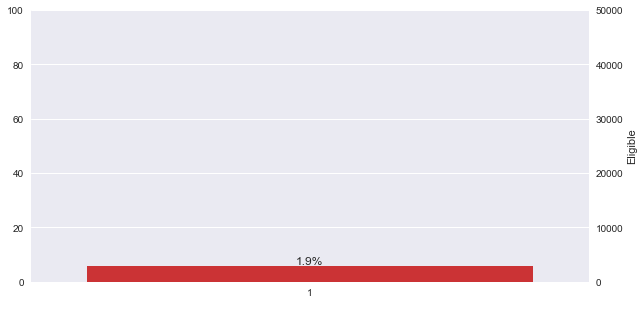

In [399]:
ax = sns.countplot(x = test_pd.Eligible ,palette="Set1")
sns.set(font_scale=1.5)
sns.set(style="darkgrid")
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel('Eligible')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=50000)
add_freq()
plt.show()

#### Summary

From the above plot we can see that 1.9% of customers out of 45000 are eligible for lending loans. More the number of historical data/features more improved prediction accuracy can be acheived with the implemented learning model. We can use this program/module as an API or integration tool for an enterprise application using a web service with proper testing.

I started with the data exploration where I got a feeling for the dataset, checked about missing data and learned which features are important. During this process I used seaborn and matplotlib to do the visualizations. During the data preprocessing part, I computed missing values, and created new features. Afterwards I started training 4 to 5 different machine learning models, picked one of them (random forest) and applied K-Fold cross validation on it. In between I tried as well ensembling techniques. Of course there is still more for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other for eg: pearson's correlation coefficient, identifying and removing the noisy features.